As the data from the Hippokratia paper is insufficient, I can't correlate the data as it wouldn't tell us anything of value, However, by using this data as a basis and then creating a random data matrix by using the mean of both height and ROM and then create a range by +/- from the mean of the Preop, 48 months after implantation and 96 months after implanatation for the mean Height and ROM, we can simulate the data and then analyse the findings. 

First a plan of action must be created to understand how i will analyse this data,

- Simulate data using data from the Hippokratia paper as a basis

- Check for normality to see if the data can be analysed 

- Use different statiscal analysis tests to look at the correlation between mean height and ROM at the Preop, 48 months and 96 months level

- conclude findings

In [79]:
# importing different libraries to use for the statistical analysis of the data
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats 

# HR being Height and ROM
HR = pd.read_csv("Height and ROM.csv")
HR

,Time,ROM M,ROM SD,Height M,Height SD
0,Preop,28.2,25.7,7.9,1.4
1,48 months,26.4,9.9,9.1,1.1
2,96 months,20.2,11.8,11.3,2.7


In [80]:
# creation of a dataframe using the above csv
df = pd.DataFrame(HR)

# calling columns from the csv
RMpre = (df.iloc[0,1])
RSpre = (df.iloc[0,2])
HMpre = (df.iloc[0,3])
HSpre = (df.iloc[0,4])

# creating the preoperative variables for both Height and ROM 
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))

In [81]:
# calling columns from the csv
RM48 = (df.iloc[1,1])
RS48 = (df.iloc[1,2])
HM48 = (df.iloc[1,3])
HS48 = (df.iloc[1,4])


# creating the variables at 48 months after implantation for both Height and ROM 
ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))

In [82]:
# calling columns from the csv
RM96 = (df.iloc[2,1])
RS96 = (df.iloc[2,2])
HM96 = (df.iloc[2,3])
HS96 = (df.iloc[2,4])

# creating the variables at 96 months after implantation for both Height and ROM 
ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = 100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = 100))


# Normality checking

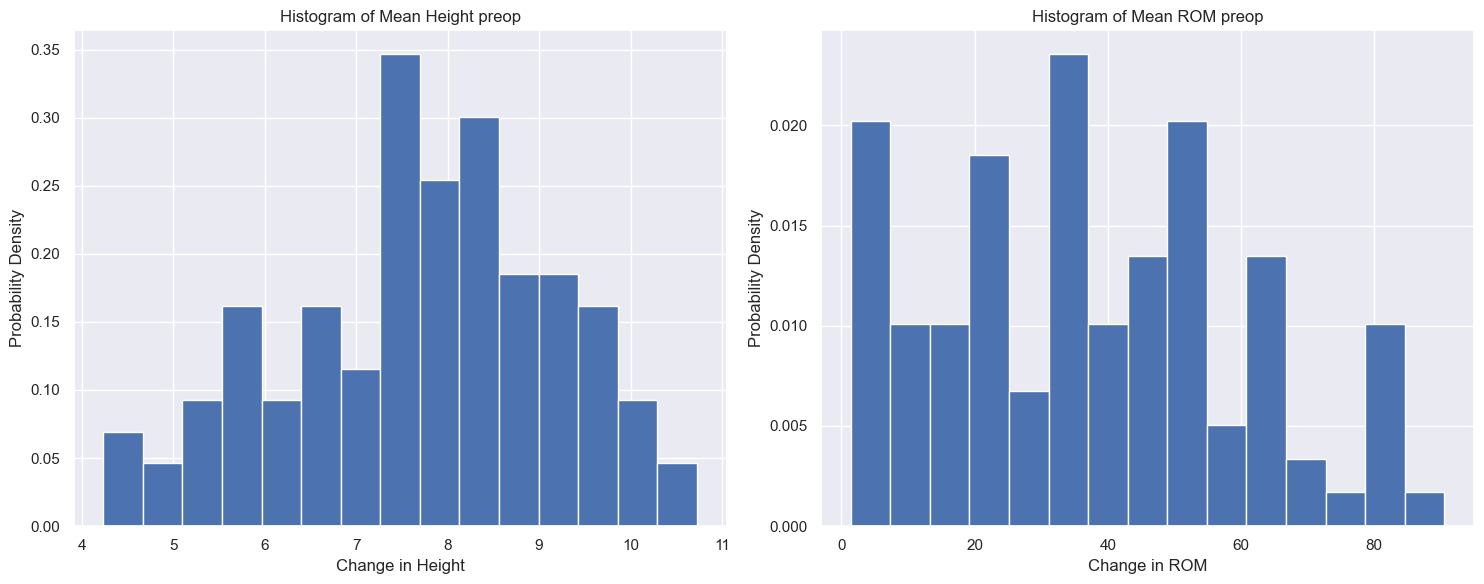

In [83]:
from scipy.stats import norm 

# creating variables by creating a random sample by taking the mean from the preop in the study and +/- it by the standard deviation and getting 100 simulated datapoints
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))


#x = np.linspace(min(ROM_preop), max(ROM_preop))
#pdf = norm.pdf(x, np.mean(ROM_preop), np.std(ROM_preop))


# creating a figure 
plt.figure(figsize=(15, 6))


# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_preop, bins=15, density=True)
plt.title('Histogram of Mean Height preop')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

#plt.plot(x,pdf, 'r-', label= 'Normal distribution')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_preop, bins=15, density=True)
plt.title('Histogram of Mean ROM preop')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')


plt.tight_layout()
plt.show()


Looking at the graphs it can be seen that they don't follow a normal distribution, however, to conform this the Shapiro-Wilk test will be used.


R_value: -0.0028720132367075907


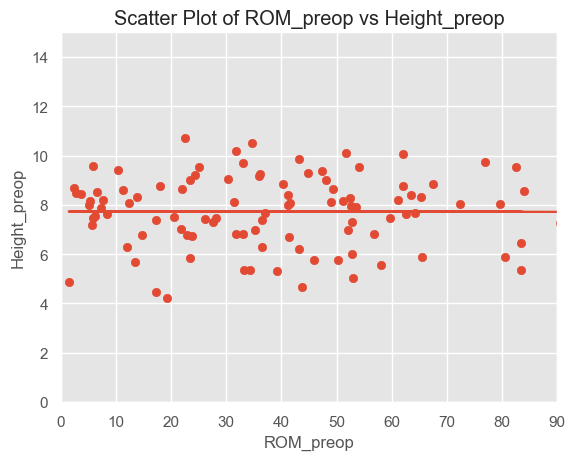

In [84]:
from scipy.stats import linregress
from scipy.stats import pearsonr

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_preop).flatten()
y = np.array(Height_preop).flatten()

# creating a scatter plot using these arrays
plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)

# Calculate the correlation coefficient and p-value
R_value, p_value = pearsonr(x, y)

# Print the correlation coefficient
print(f'R_value: {R_value}')

# creating limits for the scatter plots x and y axis
plt.xlim(0,90)
plt.ylim(0,15)

# creating labels for the x and y axis and then creating a title for the scatter plot 
plt.xlabel('ROM_preop')
plt.ylabel('Height_preop')
plt.title("Scatter Plot of ROM_preop vs Height_preop")


plt.show()

At the time of writing this, the R value for the preop value is 0.079, this tells us that there is very little correlation between these two values at this point in time. This does make sense as at the preoperative level as the PDN hasn't been implanted.

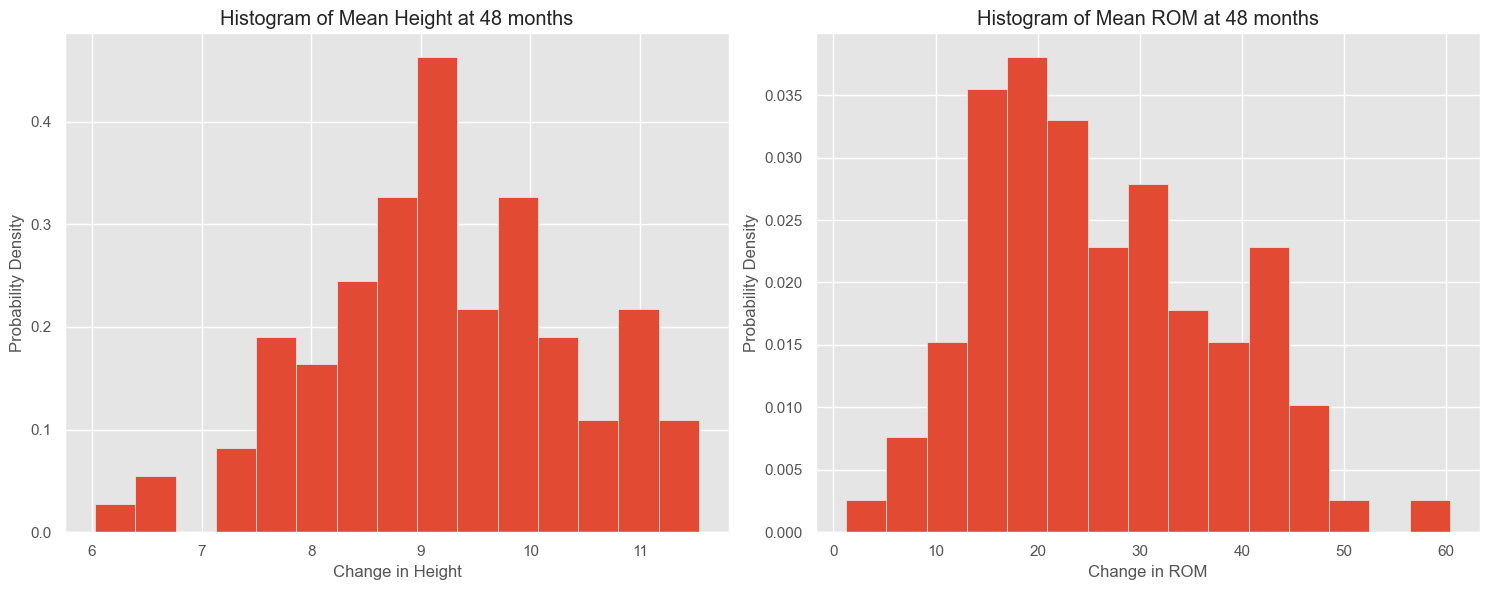

In [85]:

#creating variables by creating a random sample by taking the mean from the 48 month in the study and +/- it by the standard deviation and getting 100 simulated datapoints
ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))



plt.figure(figsize=(15, 6))

# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_48m, bins=15, density=True)
plt.title('Histogram of Mean Height at 48 months')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_48m, bins=15, density=True)

# creating a title for the histogram and labelling the x and y axis 
plt.title('Histogram of Mean ROM at 48 months')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')


plt.tight_layout()
plt.show()


Both of the histograms for the data at 48 months are normally distributed 

R_value: 0.16838454002447378


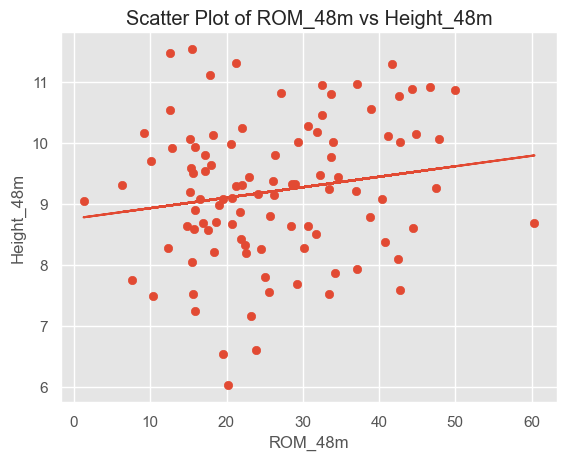

In [86]:

from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_48m).flatten()
y = np.array(Height_48m).flatten()

# creating a scatter plot
plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)

# Calculate the correlation coefficient and p-value
R_value, p_value = pearsonr(x, y)

# Print the R value 
print(f'R_value: {R_value}')

# creating labels for x and y axis and creating a title
plt.xlabel('ROM_48m')
plt.ylabel('Height_48m')
plt.title('Scatter Plot of ROM_48m vs Height_48m')


plt.show()

At the 48 month mark, the R-value is 0.09, this means that there is a very low level of correlation between these two values.

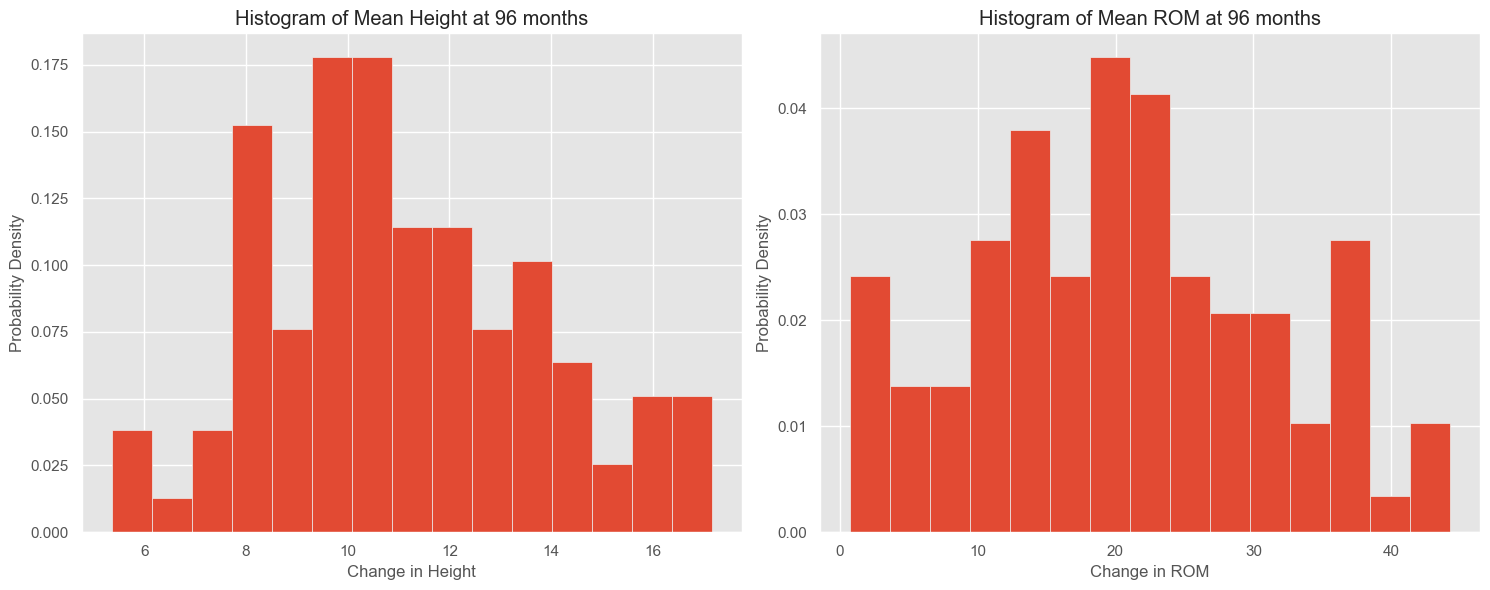

In [87]:

from scipy.stats import norm


#creating variables by creating a random sample by taking the mean from the 96 month in the study and +/- it by the standard deviation and getting 100 simulated datapoints
ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = 100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = 100))

plt.figure(figsize=(15, 6))

# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_96m, bins=15, density=True)
plt.title('Histogram of Mean Height at 96 months')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_96m, bins=15, density=True)
plt.title('Histogram of Mean ROM at 96 months')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

The mean height at 96 months looks to follow a normal distribution with some slight variance, however the histogram of mean ROM at 96 months doesn't follow a normal distribution. Once again, by using the Shapiro-Wilk test, the normality will be tested.

R_value: -0.1655464625163644


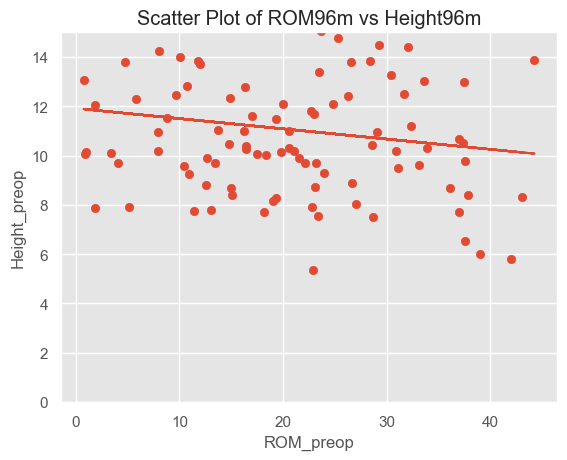

In [88]:

from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_96m).flatten()
y = np.array(Height_96m).flatten()


plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)

# Calculate the correlation coefficient and p-value
R_value, p_value = pearsonr(x, y)

# Print the correlation coefficient
print(f'R_value: {R_value}')

# creating a scatter plot and setting different x and y limits 

#plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel('ROM_preop')
plt.ylabel('Height_preop')
plt.title('Scatter Plot of ROM96m vs Height96m')

plt.show()



R_value: -0.2551382254772729


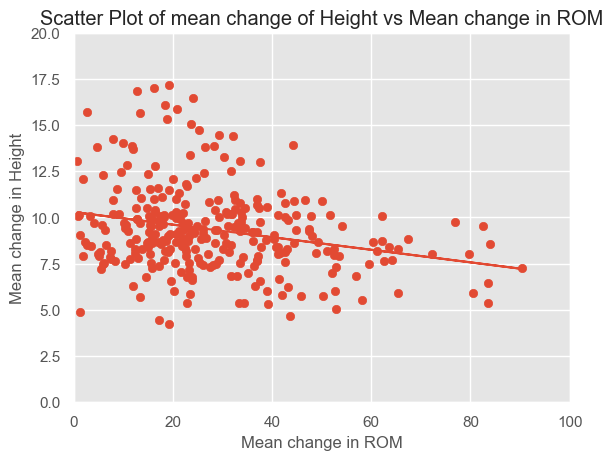

In [89]:

from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM, np.concatenate joins mulitple arrays together 
x = np.array(np.concatenate([ROM_preop, ROM_48m, ROM_96m])).flatten()
y = np.array(np.concatenate([Height_preop, Height_48m, Height_96m])).flatten()

# create scatter plot 
plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)

# Calculate the correlation coefficient and p-value
R_value, p_value = pearsonr(x, y)

# Print the correlation coefficient
print(f'R_value: {R_value}')


plt.xlim(0,100)
plt.ylim(0,20)
plt.xlabel('Mean change in ROM')
plt.ylabel('Mean change in Height')
plt.title('Scatter Plot of mean change of Height vs Mean change in ROM')


plt.show()

From the findings of the larger simulated data, it seems to look like there is almost no correlation as the value is -0.13, which indicates a small amount of negative correlation between the Height change and the ROM from preoparative to 96 months after the implantation of the PDN prosthetic.

This is advantageous for the PDN as if there were a negative correlation between the Height change and ROM then the prothestic may be useless as the PDN wouldn't be much better than having a spinal fusion after herniation of a disc in the spine.


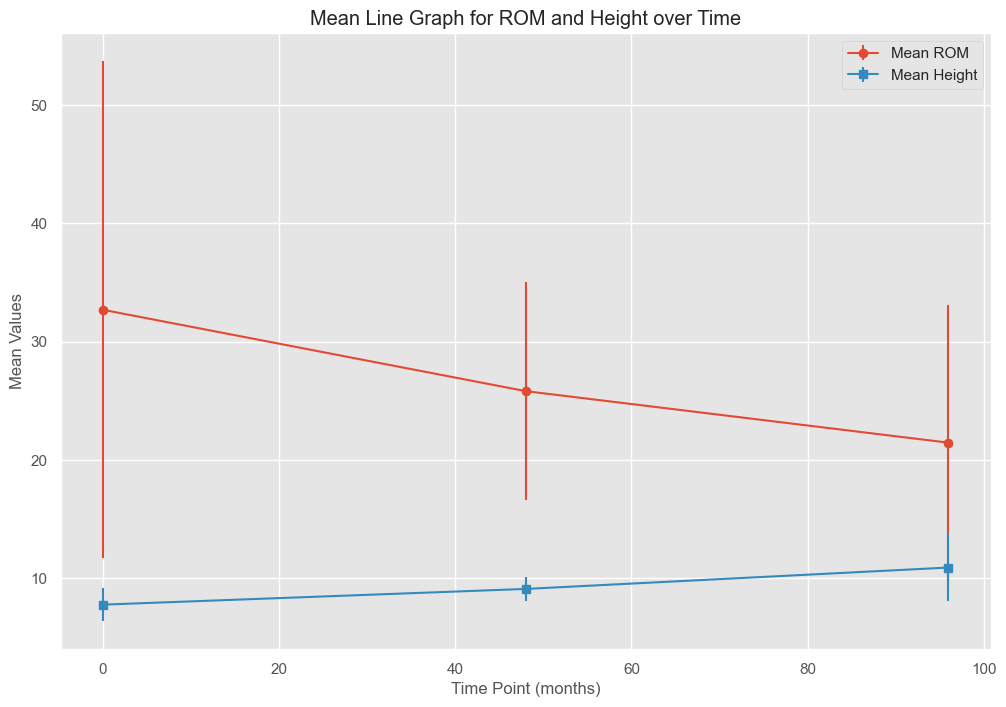

In [90]:

# data from each time point for Height and ROM
ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))
ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = 100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = 100))
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))


# Calculate means and standard deviations for each time point
mean_ROM = [np.mean(ROM_preop), np.mean(ROM_48m), np.mean(ROM_96m)]
std_ROM = [np.std(ROM_preop), np.std(ROM_48m), np.std(ROM_96m)]

mean_Height = [np.mean(Height_preop), np.mean(Height_48m), np.mean(Height_96m)]
std_Height = [np.std(Height_preop), np.std(Height_48m), np.std(Height_96m)]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the line for ROM
plt.errorbar([0, 48, 96], mean_ROM, yerr=std_ROM, label='Mean ROM', marker='o')

# Plotting the line for Height
plt.errorbar([0, 48, 96], mean_Height, yerr=std_Height, label='Mean Height', marker='s')

# Adding labels and title
plt.xlabel('Time Point (months)')
plt.ylabel('Mean Values')
plt.title('Mean Line Graph for ROM and Height over Time')
plt.legend()

# Show the plot
plt.show()



Using the mean of the simulated data for each time point, it made it easier to visualise the relationship as without averaging it, the graph would be a mess of data points. 

In this line graph, the error bars represent the standard deviation of the the variables in the preop, 48 month and 96 months.

The relationship between the Height change and ROM can also be easily visualised in this line graph as Height increases, the ROM decreases.

# Hypothesis Testing 

Null hypothesis: When height of the disc increases after implantation, there will be no statistical change in the ROM


Alternate hypothesis: When the height of the disc increases after implantation, the mean ROM of the patients will decrease significantly 

The shapiro-wilk test is one type of hypothesis test that allows us to decide whether or not sample data is from a normal distribution. The Shapiro-Wilk test does this by ordering the data and standardising the sample by converting the data to a distribution with the mean = 0 and standard deviation = 1. The statistic outputted will be between 0 and 1, with one being a perfect match. 

If the output statistic is small, it will conclude with a rejection of the null hypothesis. 

In [91]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 



# creating a random number of heights based off the preoperative ROM and Height +/- the standard deviation with a size of 100 patients
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size =100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))

Preop = np.concatenate([ROM_preop, Height_preop])



# printing the shapiro-wilk statistic alongside the p-value 
print(f'shapiro ROM_preop: {shapiro(Preop)}')

 

shapiro ROM_preop: ShapiroResult(statistic=0.7637721300125122, pvalue=1.2408182997350285e-16)


The Shapiro-wilk test outputs the statistic of 0.7~ when ran with the second significant figure changing due to the random sample. The p-value outputted is very small, at 1.44*10^-16, this is most likely due to the random nature of the data, if there is a larger amount of outlier for one set of data to another.

In [99]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 




ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))

month_48 = np.concatenate([ROM_48m, Height_48m])



# prints the shapiro-wilk statistic alongside a p-value
print(f'shapiro ROM_48m and Height_48m: {shapiro(month_48)}')


shapiro ROM_48m and Height_48m: ShapiroResult(statistic=0.8348347544670105, pvalue=8.353373196065203e-14)


The Shapiro-wilk test outputs the statistic of ~0.99 when ran. This value means it the distribution is almost normal. The p-value outputted is very near 1 ,this would mean that there is little significance with these two datapoints in particular.

In [100]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 



ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size =100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size =100))

# np.concatenate joins the two arrays together and combines them 
month_96 = np.concatenate([ROM_96m, Height_96m])

# prints the shapiro-wilk statistic alongside a p-value
print(f'shapiro ROM_96m: {shapiro(month_96)}')


shapiro ROM_96m: ShapiroResult(statistic=0.8881834149360657, pvalue=4.73182014404383e-11)


The Shapiro-wilk test outputs the statistic of ~0.99 when ran, meaning the data is near enough a normal distribution. The p-value outputted is ~0.78, meaning that there is a low level of signicance between these two data points.

In [94]:
# shapiro-wilk test for all data 

ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))
ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = 100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = 100))
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))

# np.concatenate joins together the multiple arrays and combines them 
Shapiro_Wilk_all_data =  np.concatenate([ROM_preop.flatten(), Height_preop.flatten(), ROM_48m.flatten(), Height_48m.flatten(), ROM_96m.flatten(), Height_96m.flatten()])

# prints the shapiro-wilk statistic alongside a p-value
print(f'Shapiro_Wilk_all_data: {shapiro(Shapiro_Wilk_all_data)}')


Shapiro_Wilk_all_data: ShapiroResult(statistic=0.8312296867370605, pvalue=1.1310958829995037e-24)


The Shapiro-wilk test outputs the statistic of ~0.8 when ran with the second significant figure changing due to the random sample. The p-value outputted is extremely small, this is most likely due to the random nature of the data, if there is a larger amount of outlier for one set of data to another.

In [97]:

# creation of a directionary for each data point 
data = {
    'ROM_preop': ROM_preop,
    'ROM_48m': ROM_48m,
    'ROM_96m': ROM_96m,
    'Height_preop': Height_preop,
    'Height_48m': Height_48m,
    'Height_96m': Height_96m,
}

# Create a DataFrame from the data 
df = pd.DataFrame(data)

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Printing the correlation matrix
print(correlation_matrix)


              ROM_preop   ROM_48m   ROM_96m  Height_preop  Height_48m  \
ROM_preop      1.000000  0.142746  0.187109      0.054638    0.039206   
ROM_48m        0.142746  1.000000  0.011353      0.050978   -0.053414   
ROM_96m        0.187109  0.011353  1.000000     -0.006372   -0.236661   
Height_preop   0.054638  0.050978 -0.006372      1.000000    0.030569   
Height_48m     0.039206 -0.053414 -0.236661      0.030569    1.000000   
Height_96m     0.098981  0.116107  0.116481     -0.005254    0.103563   

              Height_96m  
ROM_preop       0.098981  
ROM_48m         0.116107  
ROM_96m         0.116481  
Height_preop   -0.005254  
Height_48m      0.103563  
Height_96m      1.000000  


From the above correlation matrix it can be seen that there is very little correlation between variables, this in turn relates back to the scatter plots as there was also little correlation there. As there seems to be little correlation between points but also the p-values are shown to be significant. 

# Conclusion of findings

A conclusion must be drawn from these results. When looking at the P-values it would seem that the null hypothesis must be rejected if I want to be 95% confident, the value must be P>0.05. However, some of the P-values look to be extremely low which causes concern as the simulated sample may have skewed the results. 

The inverse could be said, when looking at the scatter plots. They all seem to show either an extremely small positive correlation, or with the scatter plot of all the data points, it shows an extremely small negative correlation. This does mean there is some correlation between values, but, it is most likely not statisitically relevant.

Statistically speaking, if we take the P-values at face value, the null hypothesis must be rejected, meaning that there is a statistical change from when the PDN was implanted to 96 months later, however, I believe these p-values are due to a computational error so therefore I will reject the null hypothesis due to the data having low correlation values.


